## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [2]:
df = pd.read_csv('./diabetes.csv')
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [3]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [6]:
X = df.drop(columns='Outcome')
y = df['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123,stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

테스트 사이즈는 전체 데이터의 20~40%로 해야 좋다. 테스트 사이즈가 너무 작으면 모델이 훈련 데이터에 과적합 될 수 있고 테스트 사이즈가 너무 크면 모델이 과소적합될 수 있다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

stratify를 사용하여 훈련 및 테스트 세트가 각 클래스의 비율을 동일하게 유지할 수 있도록 해준다. 

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [8]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    #accuracy, precision, recall, f1, roc_auc(roc_auc_score의 경우 y_test와 pred_proba로 측정)는 직접 작성
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

True Positive (TP): 모델이 실제 Positive 클래스를 Positive로 올바르게 예측한 수  
False Negative (FN): 모델이 실제 Positive 클래스를 Negative로 잘못 예측한 수  
False Positive (FP): 모델이 실제 Negative 클래스를 Positive로 잘못 예측한 수  
True Negative (TN): 모델이 실제 Negative 클래스를 Negative로 올바르게 예측한 수

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [9]:
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8433


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

solver: LogisticRegression 모델에서 사용하는 하이퍼 파리미터 중 하나로, 비용함수의 최솟값을 어떠한 방법으로 찾을 것인지를 지정하는 역할  


- newton-cg: 뉴튼-랩슨(Newton-Raphson)방법을 의미한다. 이는 경사하강법과 마찬가지로 여러 번의 업데이트를 통해서 비용함수를 최소화하는 파라미터의 값을 찾는 방법이다. 하지만 2차 도함수를 계산하는 것이 필요하다는 단점이 있다. 사용할 수 있는 규제화 방법에는 l2와 none이 있다.

- lbfgs: 뉴튼-랩슨 방법을 약간 변형한 방법으로, 차이점은 2차 도함수를 정확하게 계산하는 것이 아니라 근사치를 사용하여 속도를 개선했다는 점이다. 사용할 수 있는 규제화 방법에는 l2와 none이 있다

- liblinear: 경사하강법은 한 번에 여러개의 파라미터를 업데이트하지만, liblinear은 한 번에 하나의 파라미터만 업데이트한다는 점이 다르다. 사용할 수 있는 규제화 방법에는 l1과 l2가 있다.

- sag: 경사하강법과 유사하게 작동하지만, 차이점은 이전 업데이트 단계에서의 경사값을 현재 업데이트에 사용, 사용할 수 있는 규제화 방법에는 l2와 none

- saga: l1, l2, elasticnet, none까지 모두 사용가능하게 지원되는 방식

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 클래스의 레이블을 나타내고 pred_proba는 각 클래스에 속할 확률을 나타낸다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [10]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

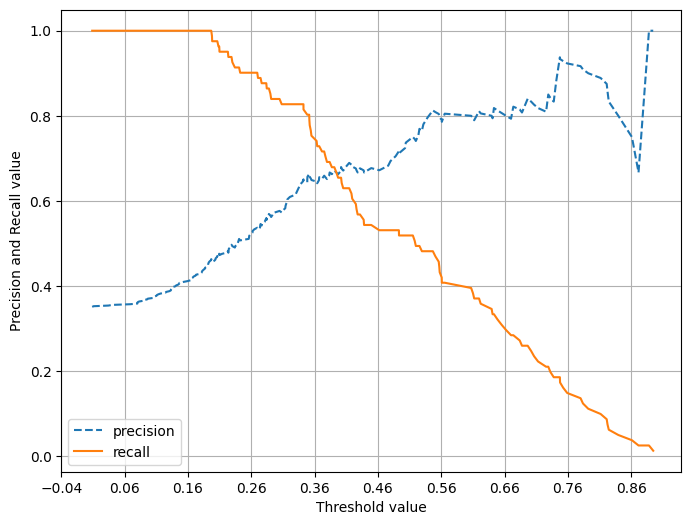

In [11]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [13]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체

df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].mean(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].mean(), inplace=True)
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [14]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

사용하는 이유  
- 각 feature의 값의 범위가 다를 경우, 모델이 특정 feature에 지나치게 영향을 받는 것을 방지하여 모델의 성능을 향상시키기 위해서이다.  

종류  
- Standardiztion : 평균이 0이고 표준편차가 1인 분포로 변환
- Normalization : 값의 범위를 [0, 1]로 변환
- Robust Scaling : 중앙값(median)과 IQR(Interquartile Range)을 이용하여 스케일링을 수행
- Log Transformation : 데이터를 로그를 취하여 정규 분포에 가깝게 만들어줌

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [16]:
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"=== {model_name} ===")
    clf_eval(y_test, pred, pred_proba)

=== Logistic Regression ===
오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584
=== Random Forest ===
오차 행렬,
 [[132  18]
 [ 35  46]]
정확도: 0.7706, 정밀도: 0.7188, 재현율: 0.567901, F1: 0.6345, AUC:0.8333
=== Support Vector Machine ===
오차 행렬,
 [[136  14]
 [ 39  42]]
정확도: 0.7706, 정밀도: 0.7500, 재현율: 0.518519, F1: 0.6131, AUC:0.8459
=== Gradient Boosting ===
오차 행렬,
 [[124  26]
 [ 30  51]]
정확도: 0.7576, 정밀도: 0.6623, 재현율: 0.629630, F1: 0.6456, AUC:0.8417
